# Lab 3: Acceleration due to Gravity

$\textbf{Objective}$

This lab demonstrates the use of Newton's laws of motion to find the experimental value of acceleration due to gravity (g).

$\textbf{Introduction}$

A ball was dropped from a certain height, and its free-fall motion was observed. The time, positions, and velocities in the x and y directions were recorded using Tracker video analysis software. The data was then exported to a .csv file.

The `acceleration_due_to_gravity.csv` file contains the time (t), the positions (x, y), and the velocities (vx, vy) of the ball along the x and y directions.

After creating the .csv file, the data was analyzed in Python using numpy and pandas. Matplotlib was used to generate scatter plots of position vs. time and velocity vs. time.

Note: Since the ball was in free-fall under the force of gravity, there was no motion along the x-direction. So, only the y (vertical) direction was analysed.

$\textbf{Theory}$

According to the kinematic equation of motion of an object under free fall is:
$$
v_y = v_{0y} + gt
$$
and the slope-intercept form of an equation is:
$$
y = mx + b
$$

Comparing the equations, $y=v_y$ and $x=t$, and the slope m corresponds to the acceleration due to gravity (g), and the intercept b corresponds to the initial velocity, $v_{0y}$.

$\textbf{Results}$

Using numpy's polyfit method, we can obtain the slope and intercept of the graph. 
Further, the linear regression fit of the graph yields the equation:
$$
v_y = -8.49t + 44.13
$$

Here, $m = -8.49m/s^2$, which is equal to the acceleration due to gravity (g). Since we assumed the downward direction as negative, the value of the slope (g) is also negative. Hence, the magnitude of the acceleration due to gravity is:
$$
g = |m| = 8.49m/s^2
$$

The images `position_vs_time.jpeg` and `velocity_vs_time.jpeg` are the scatter plots of position v/s time and velocity v/s time of the free-fall motion of the ball, respectively.

$\textbf{Some sample calculations}$

If we take two points from the .csv file as:
$$
\begin{aligned}
(t_1,v_{y1}) = (5.50s, -2.54m/s) \\
(t_2,v_{y2}) = (5.70s, -4.22m/s) \\
\end{aligned}
$$

If we calculate the slope using the formula:
$$
\begin{aligned}
m=\frac{y_2-y_1}{x_2-x_1} \\
m=\frac{v_{y2}-v_{y1}}{t_2-t_1}\\
g=\frac{-4.22-(-2.54)}{5.70-5.50}\\
g=-8.4m/s^2 \\
\end{aligned}
$$

We obtain $g=-8.4m/s^2$, which is similar to the experimental value of $g=-8.49m/s^2$. 

$\textbf{Discussion}$

Using the slope and intercept found, the experimental value for the acceleration due to gravity is 
$$
g=(-8.49\pm 0.28)m/s^2
$$

It can be observed that the experimental value of g is lower than the value of $g=9.8m/s^2$. 
There can be several reasons for this discrepancy. Some of them include timing errors, motion blur in the video recording, parallax due to the camera alignment, and uncertainties in choosing the ball's position frames in Tracker.

To further improve the accuracy of the results, a higher frame rate camera can be used to reduce motion blur, and also choose appropriate positions for frames in Tracker.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

The slope is  -8.493670886075991 [m/s] +/- 0.275816147729149  [m/s^2] the intercept is  44.12843354430405 [m/s] +/-  1.5392005320113116 [m/s]
The approximate value of g according to the given values is: -8.493670886075991 m/s^2.


/tmp/ipykernel_795/1375441906.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=legend_title,loc='best',prop={'size':20})


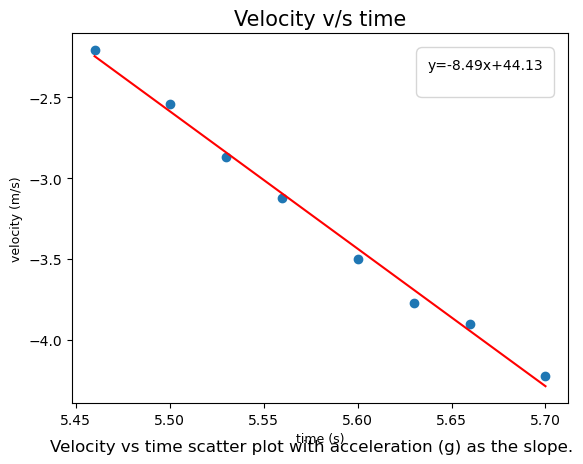

In [3]:
csv_data=pd.read_csv("acceleration_due_to_gravity.csv")
time=csv_data["t"]
position=csv_data["y"]
velocity=csv_data["vy"]
time=np.array(time)
position=np.array(position)
velocity=np.array(velocity)

plt.scatter(time,velocity)
plt.title("Velocity v/s time",fontsize=15)
plt.xlabel("time (s)",fontsize=9)
plt.ylabel("velocity (m/s)",fontsize=9)
coeffs, uncertainty = np.polyfit(time, velocity, 1, cov=True)
slope=coeffs[0]
intercept=coeffs[1]
v_fit=slope*time+intercept
slope_uncer=np.sqrt(uncertainty[0,0])
intercept_uncer=np.sqrt(uncertainty[1,1])
print("The slope is ",coeffs[0],"[m/s] +/-",slope_uncer," [m/s^2] the intercept is ",coeffs[1],"[m/s] +/- ",intercept_uncer,"[m/s]")
legend_title=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.legend(title=legend_title,loc='best',prop={'size':20})
print("The approximate value of g according to the given values is:",slope,"m/s^2.")
plt.plot(time,v_fit,color='red')
caption="Velocity vs time scatter plot with acceleration (g) as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab03_plot_vvst.jpeg')
plt.show()

The slope is  -3.24873417721521 [m] +/- 0.13009549736251513  [m/s] the intercept is  17.543936708860876 [m] +/-  0.7260019415153961 [m]
The approximate value of v according to the given values is: -3.24873417721521 m/s.


/tmp/ipykernel_795/4259046984.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=legend_title,loc='best',prop={'size':20})


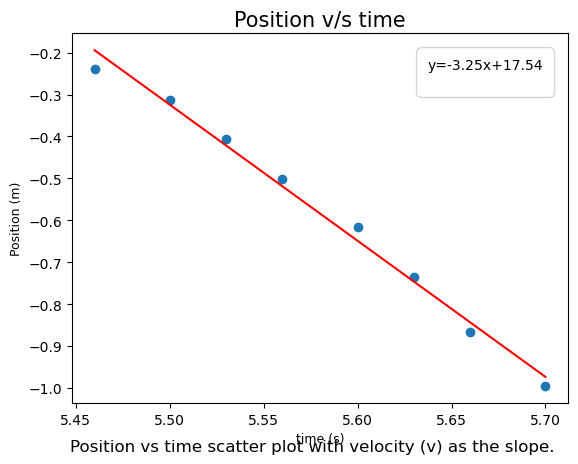

In [4]:
csv_data=pd.read_csv("acceleration_due_to_gravity.csv")
time=csv_data["t"]
position=csv_data["y"]
velocity=csv_data["vy"]
time=np.array(time)
position=np.array(position)
velocity=np.array(velocity)

plt.scatter(time,position)
plt.title("Position v/s time",fontsize=15)
plt.xlabel("time (s)",fontsize=9)
plt.ylabel("Position (m)",fontsize=9)
coeffs, uncertainty = np.polyfit(time, position, 1, cov=True)
slope=coeffs[0]
intercept=coeffs[1]
p_fit=slope*time+intercept
slope_uncer=np.sqrt(uncertainty[0,0])
intercept_uncer=np.sqrt(uncertainty[1,1])
print("The slope is ",coeffs[0],"[m] +/-",slope_uncer," [m/s] the intercept is ",coeffs[1],"[m] +/- ",intercept_uncer,"[m]")
legend_title=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.legend(title=legend_title,loc='best',prop={'size':20})
print("The approximate value of v according to the given values is:",slope,"m/s.")
plt.plot(time,p_fit,color='red')
caption="Position vs time scatter plot with velocity (v) as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab03_plot_xvst.jpeg')
plt.show()